## Working on Time Series with Pandas


* Forecasting: Principles and Practice (3rd ed) [link](https://otexts.com/fpp3/)
* Pandas documentation for time series(https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
plt.style.use('dark_background')
%matplotlib inline

In [3]:
## Generate three timestamps starting from "2023-01-01" with frequency of "1 hr"

ts_index = pd.date_range('2023-01-01', periods=3, freq= '1H')
ts_index

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

Some of the commonly used `freq` tags

| Date Offset | Frequency String | Description        |
|-------------|------------------|--------------------|
| MonthEnd    | 'M'              | calendar month end |
| Day         | 'D'              | one absolute day   |
| Hour        | 'H'              | one hour           |
| Minute      | 'T' or 'min'     | one minute         |
| Second      | 'S'              | one second         |

*Check this for other supported "freq" tags:
https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects*



**Manipulating and converting date times with timezone information**

In [4]:
## Generate timestamps specific to timezones

# Time zone UTC
print(ts_index.tz_localize("UTC"))

# Time zone Asia/kokata
print(ts_index.tz_localize("Asia/kolkata"))

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 01:00:00+00:00',
               '2023-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
DatetimeIndex(['2023-01-01 00:00:00+05:30', '2023-01-01 01:00:00+05:30',
               '2023-01-01 02:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', freq=None)


____
**Task - 1**
____

Your manager has given you a climate timeseries dataset with 1000 rows and asked you to analyse it but the dataset **does not have a timestamp column**. You are informed that each row of this dataset represents outputs from different sensors.

Your manager added that the observations were made starting from "*12th jan 2020*" and is **daily data**, meaning one obeservation recorded per day starting from `2020-01-12`.

* Create a datetime index in pandas starting from `12th jan 2020` with `1000` observatiions.

* Add timestamps as index to the dataset.



In [5]:
# Read climate data set
climate_data = pd.read_csv('https://tinyurl.com/mpbudws')
print(climate_data.head(5))

# Generate timestamp values
start_date = '2023-01-12'
data_length = climate_data.shape[0]
timestamps = pd.date_range(start = start_date, periods = data_length, freq = 'D')

# Add timestamp column to the climate_data
climate_data['timestamps'] = timestamps
climate_data = climate_data.set_index('timestamps')
print(climate_data.head(5))

   maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  uvIndex.1
0        27        12           0.0     11.6        5          1
1        27        12           0.0     11.6        5          1
2        27        12           0.0     11.6        5          1
3        27        12           0.0     11.6        5          1
4        27        12           0.0     11.6        5          1
            maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  uvIndex.1
timestamps                                                               
2023-01-12        27        12           0.0     11.6        5          1
2023-01-13        27        12           0.0     11.6        5          1
2023-01-14        27        12           0.0     11.6        5          1
2023-01-15        27        12           0.0     11.6        5          1
2023-01-16        27        12           0.0     11.6        5          1


____

**Resampling a time series**

In [6]:
## Genrate hourly data with random values for 10 periods
idx = pd.date_range('2010-01-01', periods= 10, freq= '1H')
df = pd.DataFrame({'Values': np.random.rand(10)}, index=idx)
df.head()

,Values
2010-01-01 00:00:00,0.953111
2010-01-01 01:00:00,0.773609
2010-01-01 02:00:00,0.285949
2010-01-01 03:00:00,0.858648
2010-01-01 04:00:00,0.771235


To perform resampling, the daraframe index has to be in pandas DateTime format and we need to specify the aggregation fuction like `mean()`, `min()`, `max()`, etc. Refer to official documentation of pandas resample for more information. [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [7]:
## Resample (in this case, downsample) the data to z frequency of "2 hours"
df.resample('2H').mean()

,Values
2010-01-01 00:00:00,0.863360
2010-01-01 02:00:00,0.572299
2010-01-01 04:00:00,0.472047
2010-01-01 06:00:00,0.747459
2010-01-01 08:00:00,0.545576


____
**Task - 2**
____

From your initial analysis of the climate data, you came to know that there is only a slight variation in the data on a daily basis. It is redundant to have too many values with no extra information and might cause computational overhead. So, you decide to convert the daily data to weekly data. In other words, you want to resample the climate time series from `1 day` to  `1 week`. The resampled values must be the maximum observation over the respective weeks.


In [8]:
## Resample the climate time series from 1 day to 1 week
## with values as maximum over the week
climate_data_resampled = climate_data.resample('1W').max()
climate_data_resampled.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1
timestamps,,,,,,
2023-01-15,27,12,0.0,11.6,5,1
2023-01-22,27,12,0.0,11.6,5,7
2023-01-29,27,12,0.0,11.6,5,7
2023-02-05,27,16,0.0,11.6,5,5
2023-02-12,27,16,0.0,11.6,5,6


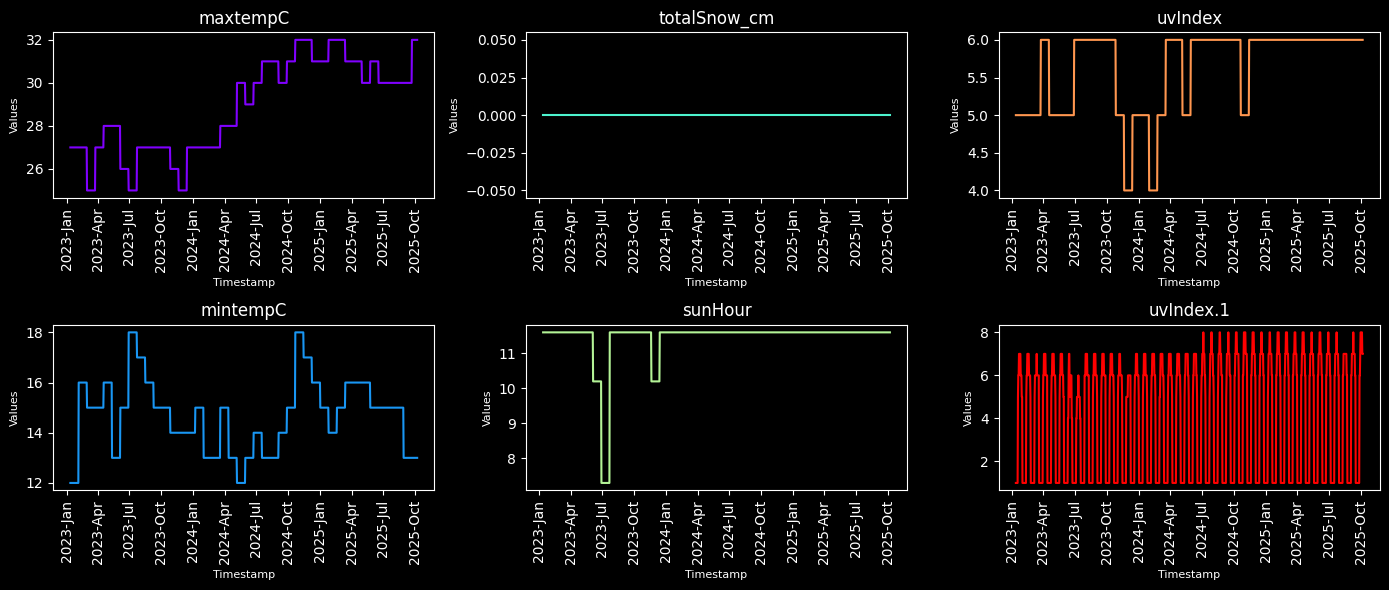

In [11]:
## Plot timeseries data
colors = cm.rainbow(np.linspace(0, 1, 6))
fig, ax = plt.subplots(2, 3, figsize = (14, 6), tight_layout = True)
for i in range(2):
  for j in range(3):
    col_index = i+2*j
    if col_index < len(climate_data.columns):
        col = climate_data.columns[col_index]
        ax[i,j].plot(climate_data.index[climate_data[col].notna()], climate_data[col][climate_data[col].notna()], color = colors[col_index])
        ax[i, j].set_xlabel('Timestamp', fontsize = 8)
        ax[i, j].set_ylabel('Values', fontsize = 8)
        ax[i, j].set_title(col, fontsize = 12)
        ax[i, j].xaxis.set_major_locator(mdates.MonthLocator(bymonth = range(1, 12, 3)))
        ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
        ax[i, j].tick_params(axis = 'x', rotation = 90);


**Performing date and time arithmetic with absolute or relative time increments**

In [ ]:
date1 = 

# add 2 days, 5 hours and 10 minutes to 1st date
date2 =

date2

____

**Task - 3**
____

Assume that the data you have was collected in India. You want to store this data in an internal database, and your database engineer tells you that their team can only work with `timestamps without time zone` (24  hour clock UTC). Achieve this by subtracting 5 hours and 30 minutes from all the values in the timestamp index.




In [ ]:
climate_data.head()

In [ ]:
climate_data.index =
climate_data.head()

____

### **Time Series Data Wrangling and Visualization**



Vizualising a subset of data using groupby and pivot. The data set consists of timestamps column `Date` (frequency is 1 day), `store` (store id), `product` (product id)  and `number_sold` (number of a product sold by a store).

In [13]:
## Data source: https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset
sales_data = pd.read_csv('https://tinyurl.com/mr2rv4yh')
sales_data.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


____

**Task - 3**
____


Convert 'date' column type to pandas.datetime and set date as index of the dataframe

In [15]:
# Convert 'date' column type to pandas.datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set Date as index of the dataframe
sales_data.set_index('Date', inplace=True)

sales_data.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [16]:
## Resample and forward fill null values
grouping_cols = ['store', 'product']

def resample_fn(data):
  """Resamples the time series to frequency
  equal to 1 Week, using average of values
  over the week and forward fill the nan values
  if present.
  """
  return data.resample('W').mean().fillna(method = 'ffill')

## Resample the data belonging to each product of each store seperately
## and group the data by 'store' and 'product' by applying the fuction above
sales_data_processed = sales_data.groupby(grouping_cols, as_index=False).apply(resample_fn)
sales_data_processed.head()

store  product  number_sold
  Date                                   
0 2010-01-03    0.0      0.0   809.666667
  2010-01-10    0.0      0.0   815.285714
  2010-01-17    0.0      0.0   826.857143
  2010-01-24    0.0      0.0   826.571429
  2010-01-31    0.0      0.0   830.285714

In [17]:
## Remove MultiIndex, only Date is required as Index
sales_data_processed = sales_data_processed.reset_index(level = 0, drop = True)
sales_data_processed.head()

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714


**Plot the sales of all the products from store id 0**

In [19]:
## Filter the data for store id equal to 0
store_id_0 = sales_data_processed[sales_data_processed['store'] == 0]
store_id_0

,store,product,number_sold
Date,,,
2010-01-03,0.0,0.0,809.666667
2010-01-10,0.0,0.0,815.285714
2010-01-17,0.0,0.0,826.857143
2010-01-24,0.0,0.0,826.571429
2010-01-31,0.0,0.0,830.285714
...,...,...,...
2018-12-09,0.0,9.0,868.000000
2018-12-16,0.0,9.0,860.142857
2018-12-23,0.0,9.0,864.000000


In [21]:
## Modify the data such that index represents date and
## columns represent the product id

store_0_pivot = store_id_0.pivot(columns='product', values = 'number_sold')
store_0_pivot.head()

product,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Date,,,,,,,,,,
2010-01-03,809.666667,847.000000,875.333333,799.000000,935.333333,870.000000,879.333333,868.666667,753.000000,782.666667
2010-01-10,815.285714,850.571429,889.285714,804.142857,939.857143,880.142857,884.714286,869.000000,756.857143,786.000000
2010-01-17,826.857143,857.428571,876.285714,799.142857,943.142857,874.428571,881.571429,870.142857,753.571429,784.142857
2010-01-24,826.571429,860.571429,874.857143,796.285714,941.285714,878.428571,871.428571,860.857143,752.142857,781.714286
2010-01-31,830.285714,849.714286,867.142857,785.285714,934.571429,875.000000,874.714286,865.142857,751.714286,779.285714


<Axes: xlabel='Date'>

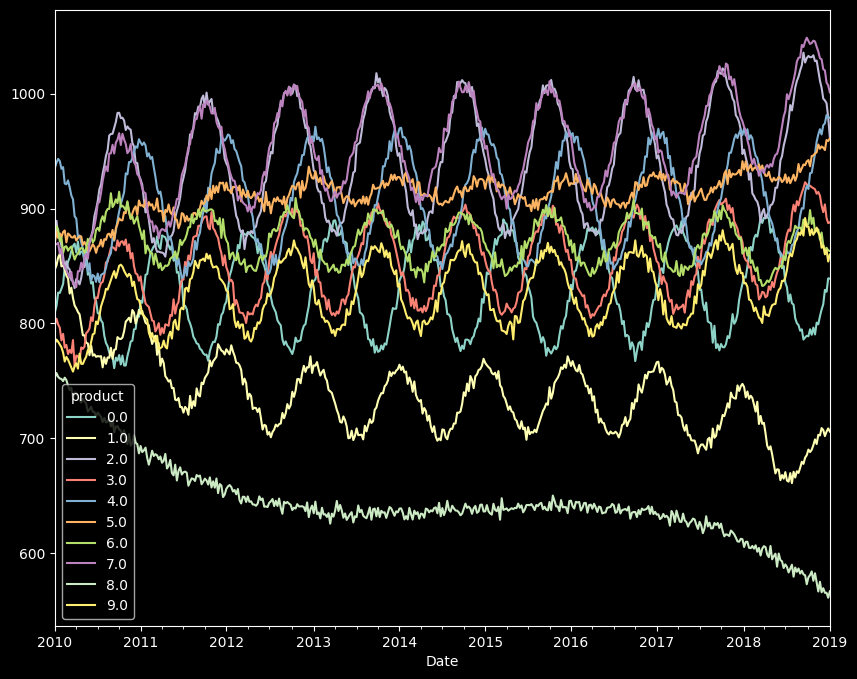

In [23]:
store_0_pivot.plot(figsize=(10,8))

Analyze how the sales of `product 1` of `store 0` have changed over the years

In [26]:
# Filter  product id equal to 1 from store_0
product_1_s0 = store_id_0[store_id_0['product'] == 1]
product_1_s0

,store,product,number_sold
Date,,,
2010-01-03,0.0,1.0,847.000000
2010-01-10,0.0,1.0,850.571429
2010-01-17,0.0,1.0,857.428571
2010-01-24,0.0,1.0,860.571429
2010-01-31,0.0,1.0,849.714286
...,...,...,...
2018-12-09,0.0,1.0,707.285714
2018-12-16,0.0,1.0,702.000000
2018-12-23,0.0,1.0,705.857143


In [29]:
# Create a column called year
product_1_s0['year'] = product_1_s0.index.year

# create a column called month
product_1_s0['month'] = product_1_s0.index.month

# create a DataFrame whose index represents months and columns respresent years
result_df = pd.pivot_table(product_1_s0, index = 'month', columns = 'year', values = 'number_sold', aggfunc = np.mean)

result_df

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_16520\530966380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['year'] = product_1_s0.index.year
C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_16520\530966380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_1_s0['month'] = product_1_s0.index.month


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,
1,853.057143,804.971429,776.571429,763.285714,760.857143,763.035714,762.114286,762.342857,738.928571,706.0
2,844.500000,788.928571,766.714286,756.285714,751.892857,755.392857,756.714286,751.321429,731.250000,NaN
3,823.714286,777.071429,751.714286,741.542857,738.857143,744.114286,743.428571,737.892857,719.178571,NaN
4,807.535714,760.357143,732.428571,722.642857,726.321429,726.607143,729.285714,715.257143,699.057143,NaN
5,783.542857,744.285714,723.250000,714.785714,712.857143,714.800000,713.228571,703.964286,676.642857,NaN
6,774.250000,730.714286,708.464286,701.628571,701.742857,707.821429,704.714286,694.178571,667.428571,NaN
7,769.071429,726.628571,706.371429,704.464286,703.964286,706.035714,704.057143,692.914286,665.485714,NaN
8,770.971429,732.642857,714.500000,706.892857,709.600000,711.600000,713.428571,700.107143,669.607143,NaN
9,778.035714,742.571429,724.857143,719.428571,724.500000,727.535714,722.035714,705.464286,680.142857,NaN


<Figure size 1000x800 with 0 Axes>

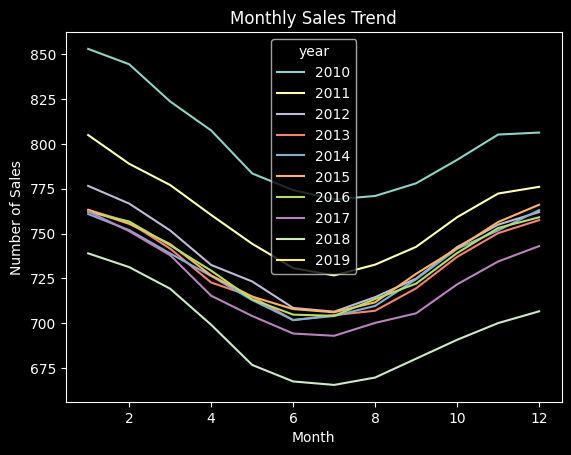

In [31]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the dataframe
result_df.plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales Trend')

# Show the plot
plt.show()
